# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
from unityagents import UnityEnvironment

%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

UnityTimeOutException: The Unity environment took too long to respond. Make sure that :
	 The environment does not need user interaction to launch
	 The Academy and the External Brain(s) are attached to objects in the Scene
	 The environment and the Python interface have compatible versions.

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
state

array([1.        , 0.        , 0.        , 0.        , 0.84408134,
       0.        , 0.        , 1.        , 0.        , 0.0748472 ,
       0.        , 1.        , 0.        , 0.        , 0.25755   ,
       1.        , 0.        , 0.        , 0.        , 0.74177343,
       0.        , 1.        , 0.        , 0.        , 0.25854847,
       0.        , 0.        , 1.        , 0.        , 0.09355672,
       0.        , 1.        , 0.        , 0.        , 0.31969345,
       0.        , 0.        ])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [11]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

KeyboardInterrupt: 

When finished, you can close the environment.

In [81]:
env.close()

ERROR:root:Exception calling application: Ran out of input
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/drlnd/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/usr/local/anaconda3/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 27, in Exchange
    return self.child_conn.recv()
  File "/usr/local/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
EOFError: Ran out of input
ERROR:root:Exception calling application: got end of file during message
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/drlnd/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/usr/local/anaconda3/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 27, in Exchange
    return self.chi

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:

In [5]:
from dqn_agent1 import Agent

In [7]:
env_info = env.reset(train_mode=True)[brain_name]

In [10]:
def dqn(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995, train_mode=True, 
        ckpt_path='pth_checkpoints/checkpoint.pth'):
    """Deep Q-Learning.
    
    Params
    ======
        agent (Agent): The agent
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train_mode (bool): if 'True' set environment to training mode
        
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    moving_avgs = []                   # list of moving averages
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                      # select an action
            env_info = env.step(action)[brain_name]             # send action to environment
            next_state = env_info.vector_observations[0]        # get next state
            reward = env_info.rewards[0]                        # get reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learning step
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)          # save most recent score to window
        scores.append(score)                 # save most recent score to total
        moving_avg = np.mean(scores_window)  # calculate moving average
        moving_avgs.append(moving_avg)       # save most recent moving average
        eps = max(eps_end, eps_decay*eps)    # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg))
        if moving_avg >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avg))
            if train_mode:
                torch.save(agent.qnetwork_local.state_dict(), ckpt_path)
            break
    return scores, moving_avgs

Episode 100	Average Score: 1.38
Episode 200	Average Score: 6.82
Episode 300	Average Score: 9.12
Episode 400	Average Score: 10.70
Episode 500	Average Score: 10.82
Episode 600	Average Score: 11.64


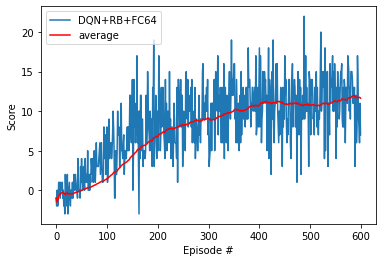

In [18]:
# run the training loop
config_dict = {
    'seed': 42, 
    'buffer_size': int(1e5), 
    'batch_size': 64, 
    'gamma': 0.99, 
    'tau': 1e-3, 
    'loss_type': 'mse',
    'gradient_clip': None, 
    'update_every': 10, 
    'lr': 5e-4, 
    'fc1_units': 64, 
    'fc2_units': 64, 
}
agent = Agent(state_size=state_size, action_size=action_size, config_dict=config_dict)
scores, avgs = dqn(agent, n_episodes=600, eps_decay=0.98, eps_end=0.1, ckpt_path='pth_checkpoints/v01_checkpoint.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN+RB+FC64')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [9]:
# run the training loop
config_dict = {
    'seed': 42, 
    'buffer_size': int(1e5), 
    'batch_size': 64, 
    'gamma': 0.99, 
    'tau': 1e-3, 
    'loss_type': 'mse',
    'gradient_clip': None, 
    'update_every': 10, 
    'lr': 5e-4, 
    'fc1_units': 64, 
    'fc2_units': 64, 
}
agent = Agent(state_size=state_size, action_size=action_size, config_dict=config_dict)

In [61]:
action = agent.act(state, 0.1)                      # select an action
env_info = env.step(action)[brain_name]             # send action to environment
next_state = env_info.vector_observations[0]        # get next state
reward = env_info.rewards[0]                        # get reward
done = env_info.local_done[0]

In [57]:
gamma = 0.99

In [63]:
p_state = torch.from_numpy(state).float().unsqueeze(0)
p_nextstate = torch.from_numpy(next_state).float().unsqueeze(0)

In [73]:
local_argmax = agent.qnetwork_local(p_nextstate).detach().argmax(dim=1).squeeze()
Q_target_next = agent.qnetwork_target(p_nextstate).detach().squeeze()[local_argmax]

In [74]:
Q_target_next

tensor(0.1566)

In [77]:
Q_target = reward + (gamma * Q_target_next * (1 - done))

In [78]:
Q_target

tensor(0.1550)

In [70]:
Q_expected = agent.qnetwork_local(p_state).squeeze()[action]

In [80]:
Q_expected.detach().numpy()

array(0.17561367, dtype=float32)

In [ ]:
error = abs(Q_expected - Q_target)


Episode 100	Average Score: 1.67
Episode 200	Average Score: 7.99
Episode 300	Average Score: 9.25
Episode 400	Average Score: 9.935
Episode 500	Average Score: 11.25
Episode 559	Average Score: 13.01
Environment solved in 459 episodes!	Average Score: 13.01


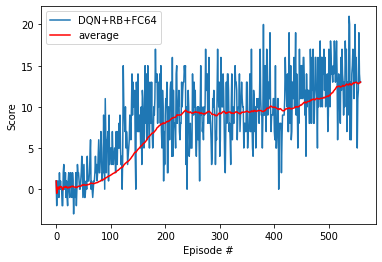

In [19]:
# run the training loop
config_dict = {
    'seed': 42, 
    'buffer_size': int(1e5), 
    'batch_size': 64, 
    'gamma': 0.99, 
    'tau': 1e-3, 
    'loss_type': 'huber',
    'gradient_clip': None, 
    'update_every': 10, 
    'lr': 5e-4, 
    'fc1_units': 64, 
    'fc2_units': 64, 
}
agent = Agent(state_size=state_size, action_size=action_size, config_dict=config_dict)
scores, avgs = dqn(agent, n_episodes=600, eps_decay=0.98, eps_end=0.1, ckpt_path='pth_checkpoints/v02_checkpoint.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN+RB+FC64')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 1.57
Episode 200	Average Score: 7.73
Episode 300	Average Score: 9.28
Episode 400	Average Score: 10.42
Episode 500	Average Score: 11.30
Episode 600	Average Score: 11.66


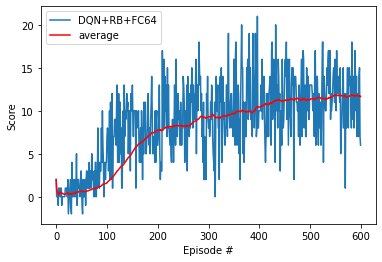

In [26]:
# run the training loop
config_dict = {
    'seed': 42, 
    'buffer_size': int(1e5), 
    'batch_size': 64, 
    'gamma': 0.99, 
    'tau': 1e-3, 
    'loss_type': 'huber',
    'gradient_clip': 1, 
    'update_every': 10, 
    'lr': 5e-4, 
    'fc1_units': 64, 
    'fc2_units': 64, 
}
agent = Agent(state_size=state_size, action_size=action_size, config_dict=config_dict)
scores, avgs = dqn(agent, n_episodes=600, eps_decay=0.98, eps_end=0.1, ckpt_path='pth_checkpoints/v02_checkpoint.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN+RB+FC64')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [15]:
env.close()

In [21]:
import torch

In [24]:
torch.clamp?

Docstring:
clamp(input, min, max, out=None) -> Tensor

Clamp all elements in :attr:`input` into the range `[` :attr:`min`, :attr:`max` `]` and return
a resulting tensor:

.. math::
    y_i = \begin{cases}
        \text{min} & \text{if } x_i < \text{min} \\
        x_i & \text{if } \text{min} \leq x_i \leq \text{max} \\
        \text{max} & \text{if } x_i > \text{max}
    \end{cases}

If :attr:`input` is of type `FloatTensor` or `DoubleTensor`, args :attr:`min`
and :attr:`max` must be real numbers, otherwise they should be integers.

Args:
    input (Tensor): the input tensor
    min (Number): lower-bound of the range to be clamped to
    max (Number): upper-bound of the range to be clamped to
    out (Tensor, optional): the output tensor

Example::

    >>> a = torch.randn(4)
    >>> a
    tensor([-1.7120,  0.1734, -0.0478, -0.0922])
    >>> torch.clamp(a, min=-0.5, max=0.5)
    tensor([-0.5000,  0.1734, -0.0478, -0.0922])

.. function:: clamp(input, *, min, out=None) -> Tensor

Clamps